## **Objective Overview**
##### Build Decision Tree / Random Forest model(s) on the provided dataset.

## **Setup**

#### Install Packages

#### Import Libraries

In [1]:
import pandas as pd
import ast
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
# from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve
# from lime.lime_tabular import LimeTabularExplainer

## **Data Exploration**

#### Load Dataset

In [2]:
data = pd.read_csv("D:\\loyalist\\sem2\\step2\\2020_out_heading_matched_out.csv")

#### Dataset Overview

In [3]:
data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,LastElection_Republican,Target,Poll,Poll0,Poll1,Poll2,Poll3,Poll4,Poll5,Poll6
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 371 entries, state_Alabama to Poll6
dtypes: float64(308), int64(63)
memory usage: 145.1 KB


## **Dataset Splitting**

### Initial split - Features (X) and label/target (y)

In [5]:
# Split data into features (X) and label (y)
X = data.drop('Target', axis=1)  # Drop the target column for features
y = data['Target']  # Target column

In [6]:
y = data['Target']
X = data.drop('Target', axis=1)

### Train-test split

In [7]:
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
test_data = pd.read_csv("D:\\loyalist\\sem2\\step2\\2023_out_heading_matched_out.csv")
test_data.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,LastElection_Republican,Target,Poll,Poll0,Poll1,Poll2,Poll3,Poll4,Poll5,Poll6
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train = X
y_train = y
X_test = test_data.drop('Target', axis=1)
y_test = test_data['Target']

In [11]:
X.head()

,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_Florida,state_Georgia,...,LastSecondElection_Republican,LastElection_Republican,Poll,Poll0,Poll1,Poll2,Poll3,Poll4,Poll5,Poll6
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print("Unique classes in y_train:", set(y_train))
print("Unique classes in y_test:", set(y_test))


Unique classes in y_train: {0, 1}
Unique classes in y_test: {0, 1}


## **Model Training and Evaluation**

### Define an Evaluation function(s)

The below function will evaluate a model on both the training and testing data, showing performance differences

*   Calculating the accuracy
*   Printing a detailed classification report (precision, recall, F1-score)
*   Plotting a confusion matrix to visualize true and false predictions

In [13]:
# Function to evaluate models on both training and testing data for binary classification
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Evaluating on Training Data
    print("\nEvaluating on Training Data:")
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.2f}")

    # Classification Report for Training Data
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred, target_names=["Class 0", "Class 1"]))

    # Confusion Matrix for Training Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Training Confusion Matrix')
    plt.show()

    # Evaluating on Testing Data
    print("\nEvaluating on Testing Data:")
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Testing Accuracy: {test_accuracy:.2f}")

    # Classification Report for Testing Data
    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=["Class 0", "Class 1"]))

    # Confusion Matrix for Testing Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Testing Confusion Matrix')
    plt.show()
    

# Example usage:
# evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)
# evaluate_model(rf_classifier, X_train, X_test, y_train, y_test)


This function below will calculate the ROC-AUC scores and plot the ROC curves for both the training and testing datasets.

In [14]:
# Function to plot AUC-ROC curve and calculate AUC score for both training and testing sets
def plot_roc_auc_train_test(model, X_train, X_test, y_train, y_test, model_name):
    plt.figure(figsize=(8, 6))

    # Training Data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    roc_auc_train = roc_auc_score(y_train, y_train_prob)
    plt.plot(fpr_train, tpr_train, label=f"{model_name} - Training (AUC = {roc_auc_train:.2f})")

    # Testing Data
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    roc_auc_test = roc_auc_score(y_test, y_test_prob)
    plt.plot(fpr_test, tpr_test, label=f"{model_name} - Testing (AUC = {roc_auc_test:.2f})")

    # Plotting settings
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # Print ROC-AUC Scores
    print(f"{model_name} ROC-AUC Score on Training Data: {roc_auc_train:.2f}")
    print(f"{model_name} ROC-AUC Score on Testing Data: {roc_auc_test:.2f}")

### Training and Evaluation

#### **Decision Tree**

In [15]:
# Initialize and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt_classifier.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training Time: {train_time:.4f} seconds")

Training Time: 0.0105 seconds



Decision Tree Model Evaluation:

Evaluating on Training Data:
Training Accuracy: 1.00

Training Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        27
     Class 1       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



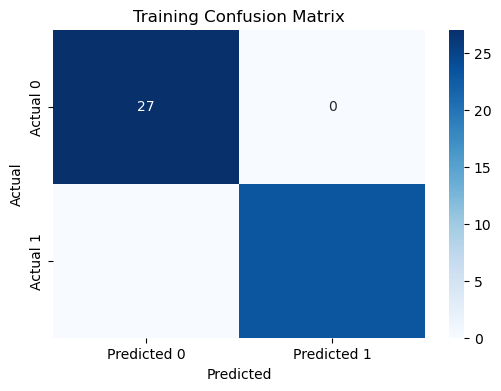


Evaluating on Testing Data:
Testing Accuracy: 0.90

Testing Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.80      0.89        25
     Class 1       0.83      1.00      0.91        25

    accuracy                           0.90        50
   macro avg       0.92      0.90      0.90        50
weighted avg       0.92      0.90      0.90        50



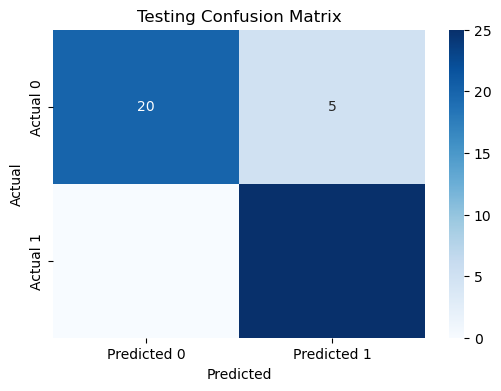

In [16]:
# Evaluate Decision Tree model on both training and testing data
print("\nDecision Tree Model Evaluation:")
evaluate_model(dt_classifier, X_train, X_test, y_train, y_test)

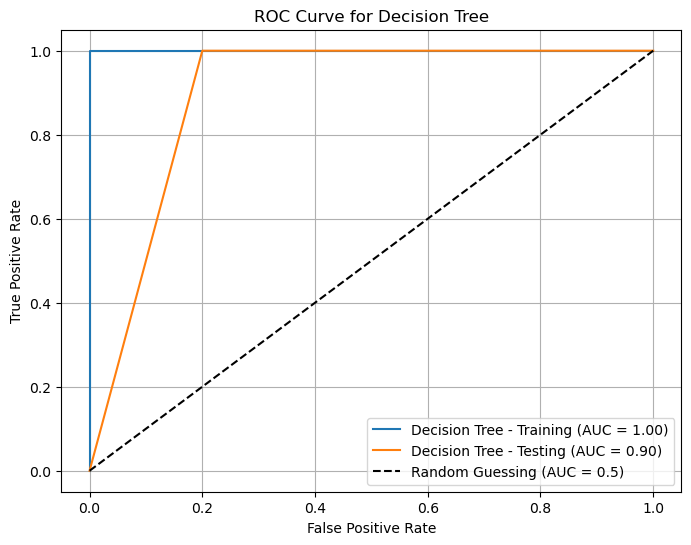

Decision Tree ROC-AUC Score on Training Data: 1.00
Decision Tree ROC-AUC Score on Testing Data: 0.90


In [17]:
# Plot AUC-ROC for Decision Tree on both training and testing data
plot_roc_auc_train_test(dt_classifier, X_train, X_test, y_train, y_test, "Decision Tree")

#### **Random Forest**

In [18]:
# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_classifier.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training Time: {train_time:.4f} seconds")

Training Time: 0.1133 seconds


In [19]:
print(sum(y_test),len(y_test))

25 50



Random Forest Model Evaluation:

Evaluating on Training Data:
Training Accuracy: 1.00

Training Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        27
     Class 1       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



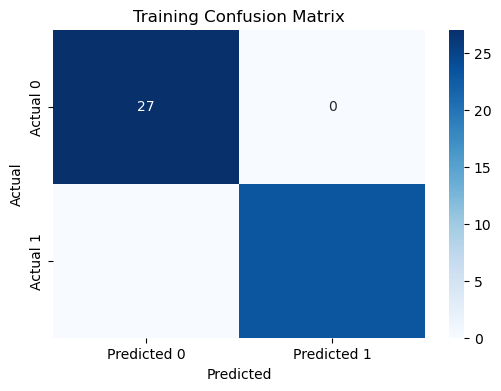


Evaluating on Testing Data:
Testing Accuracy: 0.90

Testing Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.80      0.89        25
     Class 1       0.83      1.00      0.91        25

    accuracy                           0.90        50
   macro avg       0.92      0.90      0.90        50
weighted avg       0.92      0.90      0.90        50



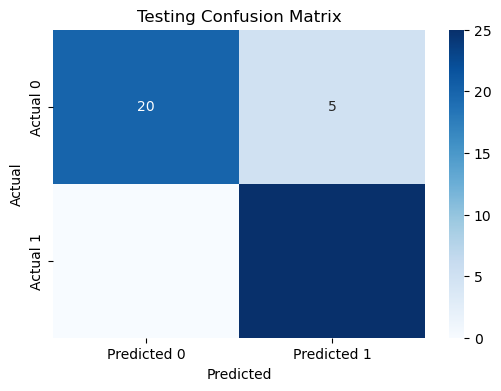

In [20]:
# Evaluate Random Forest model on both training and testing data
print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_classifier, X_train, X_test, y_train, y_test)

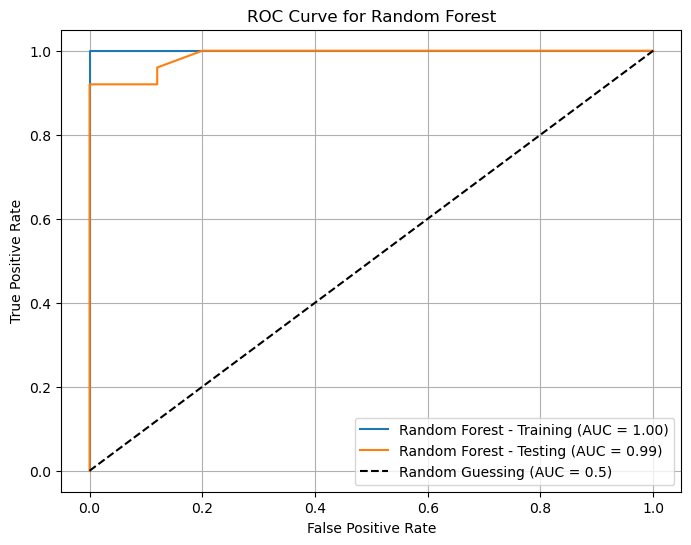

Random Forest ROC-AUC Score on Training Data: 1.00
Random Forest ROC-AUC Score on Testing Data: 0.99


In [21]:
# Plot AUC-ROC for Random Forest on both training and testing data
plot_roc_auc_train_test(rf_classifier, X_train, X_test, y_train, y_test, "Random Forest")

In [22]:
electoral_college = {
    'Alabama': 9, 'Alaska': 3, 'Arizona': 11, 'Arkansas': 6, 'California': 54,
    'Colorado': 10, 'Connecticut': 7, 'Delaware': 3, 'Florida': 30, 'Georgia': 16,
    'Hawaii': 4, 'Idaho': 4, 'Illinois': 19, 'Indiana': 11, 'Iowa': 6, 'Kansas': 6,
    'Kentucky': 8, 'Louisiana': 8, 'Maine': 4, 'Maryland': 10, 'Massachusetts': 11,
    'Michigan': 15, 'Minnesota': 10, 'Mississippi': 6, 'Missouri': 10, 'Montana': 4,
    'Nebraska': 5, 'Nevada': 6, 'New Hampshire': 4, 'New Jersey': 14, 'New Mexico': 5,
    'New York': 28, 'North Carolina': 16, 'North Dakota': 3, 'Ohio': 17, 'Oklahoma': 7,
    'Oregon': 8, 'Pennsylvania': 19, 'Rhode Island': 4, 'South Carolina': 9, 'South Dakota': 3,
    'Tennessee': 11, 'Texas': 40, 'Utah': 6, 'Vermont': 3, 'Virginia': 13, 'Washington': 12,
    'West Virginia': 4, 'Wisconsin': 10, 'Wyoming': 3, 'District of Columbia': 3,"WashingtonDC":2
}

In [23]:
y_test_pred = dt_classifier.predict(X_test)
dt_df = pd.DataFrame(y_test_pred,columns=['prediction'])
states = pd.read_csv("D:\\loyalist\\sem2\\step2\\2023_out_heading_matched.csv")[['state']]
dt_df['state']=states
dt_df['target']=y_test
dt_df['electoral_college_Seats'] = dt_df['state'].map(lambda x: electoral_college[x])
dt_df.groupby(['prediction'])['electoral_college_Seats'].sum().reset_index()

,prediction,electoral_college_Seats
0,0,233
1,1,302


In [24]:
dc =  pd.DataFrame([{'prediction': 0, 'state': 'WashingtonDC', 'target': 0, 'electoral_college_Seats': 2}])

In [25]:
y_test_pred = rf_classifier.predict(X_test)
fdf = pd.DataFrame(y_test_pred,columns=['prediction'])
states = pd.read_csv('D:\\loyalist\\sem2\\step2\\2023_out_heading_matched.csv')[['state']]
fdf['state']=states
fdf['target']=y_test
fdf= pd.concat([fdf, dc], ignore_index=True)
fdf['electoral_college_Seats'] = fdf['state'].map(lambda x: electoral_college[x])
fdf.groupby(['prediction'])['electoral_college_Seats'].sum().reset_index()

,prediction,electoral_college_Seats
0,0,235
1,1,302


In [26]:
fdf

,prediction,state,target,electoral_college_Seats
0,1,Alabama,1,9
1,1,Alaska,1,3
2,1,Arizona,0,11
3,1,Arkansas,1,6
4,0,California,0,54
5,0,Colorado,0,10
6,0,Connecticut,0,7
7,0,Delaware,0,3
8,1,Florida,1,30
9,1,Georgia,0,16


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplolib% inline
import seaborn as sns
# import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
train_df = pd.read_csv("D:\\loyalist\\sem2\\step2\\2020_out_heading_matched_out.csv")
test_df = pd.read_csv("D:\\loyalist\\sem2\\step2\\2023_out_heading_matched_out.csv")


In [29]:
# Train features
X_train = train_df.drop(columns=['Target'])

# Train target
y_train = train_df[['Target']]

In [30]:
# Test features
X_test = test_df.drop(columns=['Target'])

# Test target
y_test = test_df[['Target']]

In [31]:
# Creating the Adaboost Classifier
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1)

In [32]:
# Fit the model
ada_model = ada.fit(X_train, y_train)

C:\Users\mdabd\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mdabd\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
# Predict with X_test
y_pred = ada_model.predict(X_test)

In [34]:
# Model evaluation
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.9
Precision: 0.92
Recall: 0.9
F1 Score: 0.90


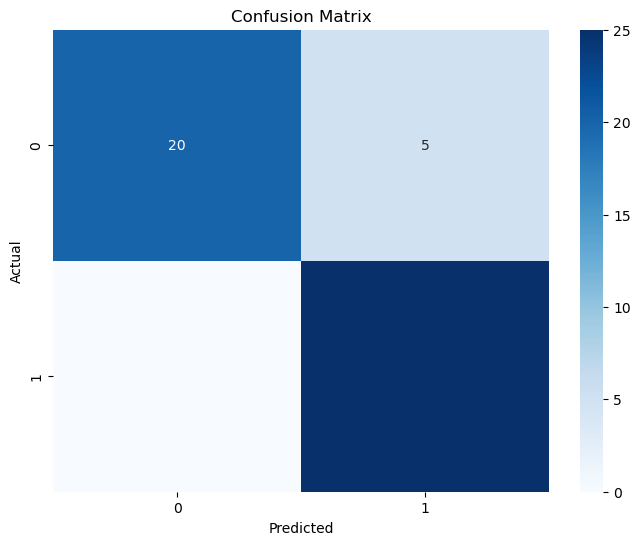

In [35]:
# Model evaluation
# Confusion matrix
cf = metrics.confusion_matrix(y_test, y_pred)

# Confusion matrix plot
plt.figure(figsize=(8,6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=ada_model.classes_, yticklabels=ada_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
from sklearn.ensemble import VotingClassifier

In [37]:
ensemble = VotingClassifier(estimators=[('rf', rf_classifier), ('ada', ada)], voting='hard')

In [38]:
ensemble_model = ensemble.fit(X_train, y_train)

C:\Users\mdabd\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mdabd\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\mdabd\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [39]:
# predict the model
y_pred2 = ensemble_model.predict(X_test)

In [40]:
# Model evaluation
accuracy = metrics.accuracy_score(y_test, y_pred2)
precision = metrics.precision_score(y_test, y_pred2, average='weighted')
recall = metrics.recall_score(y_test, y_pred2, average='weighted')
f1 = metrics.f1_score(y_test, y_pred2, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.9
Precision: 0.92
Recall: 0.9
F1 Score: 0.90


In [41]:
import pickle
with open('D:\\loyalist\\sem2\\step2\\ensemble_model.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)

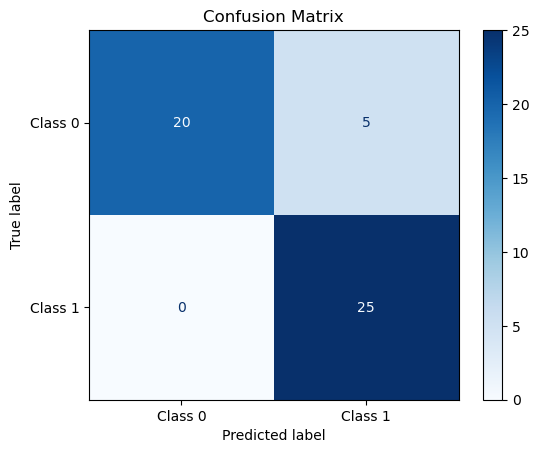

In [42]:
# Alternatively, using ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
